# Car Price Prediction ( Multiple Linear Regression)

Building a multiple linear regression model to find the variables that are significant in predicting the car price with the help of given Car data with their specifications offered by American car makers in the American market.

Steps
1. Read understand and visualise the data.
2. Prepare the data for modeling 
3. Creating the model
4. Residual analysis
5. Prediction and evaluation of the test set.

### Step 1: Read understand and visualise the data.


In [1]:
# supress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing data set
car= pd.read_csv('C:/Users/Lenovo/Downloads/upGrad Notes/Machine Learning/Multiple LR Assignment/CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.shape

(205, 26)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are no null values.

In [6]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Standardizing data

In [7]:
# removing duplicates if any.
car.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
# checking CarName column
car['CarName'].astype('category').value_counts()

peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: CarName, Length: 147, dtype: int64

As we can see this column contains Company name followed by car model name. 
But we only need company name so we have to extract it and save company name in separate column.

In [9]:
# Extracting brand name and storing it in different column
def split_func(x):
    return x.split(' ')[0]

car['Brand'] = car['CarName'].apply(split_func)

In [10]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
car['Brand'].astype('category').value_counts()


toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: Brand, dtype: int64

As we can see there are some repetition of company names because of writing mistakes.

- toyota : toyouta         
- porsche : porcshce        
- mazda : maxda  
- nissan : Nissan
- volkswagen : vw ,vokswagen      

In [12]:
# convert carnames to lower case
car['Brand'] = car['Brand'].apply(lambda y: y.lower())

# corecting the wrongly marked data in the dataset
car.loc[(car['Brand'] == 'vw') | (car['Brand'] == 'vokswagen'),'Brand'] = 'volkswagen'
car.loc[(car['Brand'] == 'toyouta'),'Brand'] = 'toyota'
car.loc[(car['Brand'] == 'maxda'),'Brand'] = 'mazda'
car.loc[(car['Brand'] == 'porcshce'),'Brand'] = 'porsche'

In [13]:
car['Brand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Brand, dtype: int64

### Checking some variables for any unwanted data type or value

In [14]:
car['enginetype'].astype('category').value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [15]:
car['fuelsystem'].astype('category').value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [16]:
car['fueltype'].astype('category').value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [17]:
car['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [18]:
car['carbody'].astype('category').value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [19]:
car['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [20]:
car['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [21]:
car['doornumber'].astype('category').value_counts()


four    115
two      90
Name: doornumber, dtype: int64

 As we can see the above two variables cylindernumber and doornumber are in object type they can be converted to integers.

In [22]:
# converting doornumber and cylindernumber from object to integer form
car['doornumber'] = car['doornumber'].map({'two':2,'four':4})
car['cylindernumber'] = car['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})

In [23]:
# after conversion
car['doornumber'].astype('category').value_counts()


4    115
2     90
Name: doornumber, dtype: int64

In [24]:
car['enginelocation'].astype('category').value_counts()


front    202
rear       3
Name: enginelocation, dtype: int64

In [25]:
car['symboling'].astype('category').value_counts()


0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

#### Dropping columns that are not relevant for the prediction

- Columns such as CarID and CarName are not relevant for the prediction, they dont affect the pricing of a car.
- Columns like enginetype, fuelsystem, enginelocation, aspiration, and fueltype are highly imbalanced classes or attributes. So we need to drop them as well.

In [26]:
# dropping redundant columns
redundant = ['CarName','car_ID','enginetype','fuelsystem','enginelocation','aspiration','fueltype']
car = car.drop(redundant, axis = 1)

In [27]:
car.head()

,symboling,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,3,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,2,convertible,rwd,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,2,hatchback,rwd,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,4,sedan,fwd,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,4,sedan,4wd,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Visualising the data

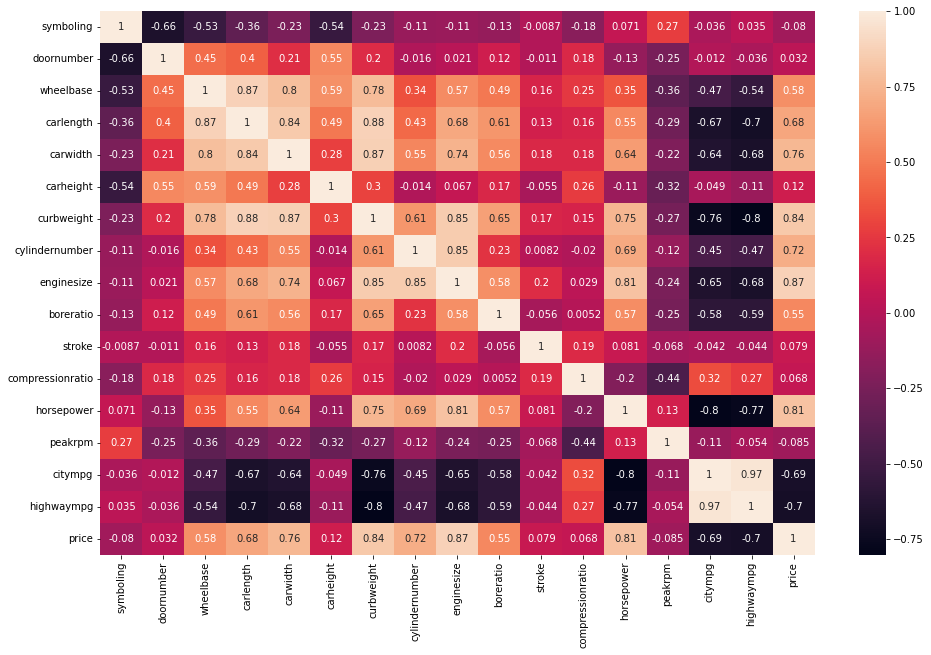

In [28]:
# Checking correlation between independent varibales using heatmap
plt.figure(figsize = (16,10))
sns.heatmap(car.corr(), annot = True)
plt.show()

- Here some columns like 'stroke', 'compressionratio', 'doornumber', 'peakrpm' have very low correlation with the price  


In [29]:
# dropping these variables
Columns = ['stroke', 'compressionratio', 'doornumber', 'peakrpm']
car = car.drop(Columns, axis = 1)

In [30]:
car.head()

,symboling,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,Brand
0,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,13495.0,alfa-romero
1,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,16500.0,alfa-romero
2,1,hatchback,rwd,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,19,26,16500.0,alfa-romero
3,2,sedan,fwd,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,24,30,13950.0,audi
4,2,sedan,4wd,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,18,22,17450.0,audi


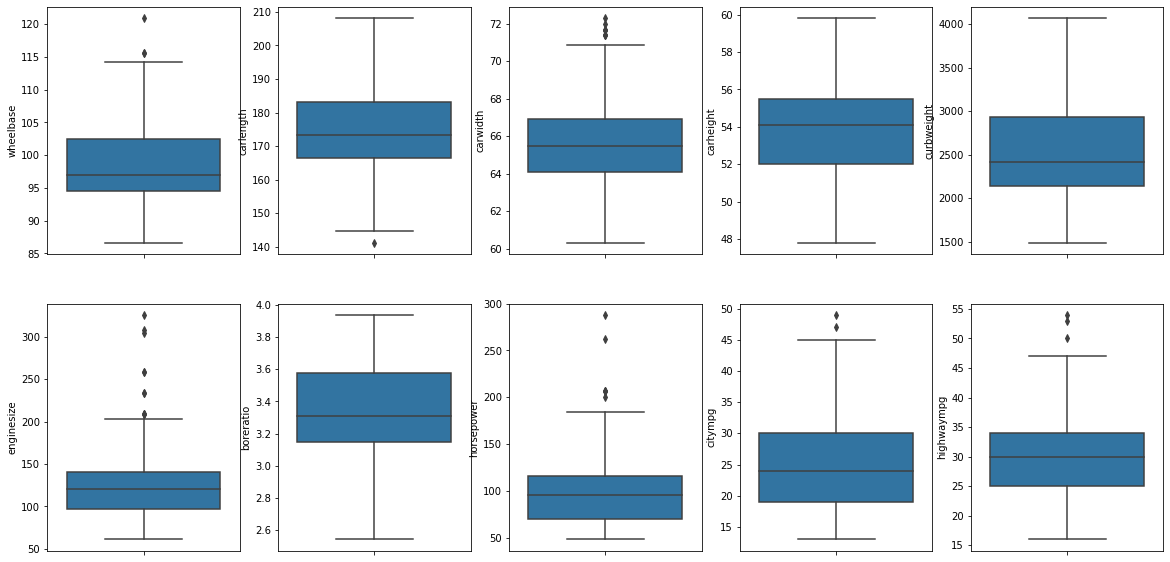

In [31]:
# checking or outliers
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.boxplot(y='wheelbase',data=car)
plt.subplot(2,5,2)
sns.boxplot(y='carlength',data=car)
plt.subplot(2,5,3)
sns.boxplot(y='carwidth',data=car)
plt.subplot(2,5,4)
sns.boxplot(y='carheight',data=car)
plt.subplot(2,5,5)
sns.boxplot(y='curbweight',data=car)
plt.subplot(2,5,6)
sns.boxplot(y='enginesize',data=car)
plt.subplot(2,5,7)
sns.boxplot(y='boreratio',data=car)
plt.subplot(2,5,8)
sns.boxplot(y='horsepower',data=car)
plt.subplot(2,5,9)
sns.boxplot(y='citympg',data=car)
plt.subplot(2,5,10)
sns.boxplot(y='highwaympg',data=car)
plt.show()

from the above boxplots we can see that enginesize has some outliers. These values can affect our prediction.


In [32]:
# 25th and 75th percentile of the values in enginesize column
Q1_es = car.enginesize.quantile(0.25)
Q3_es = car.enginesize.quantile(0.75)

# inter quartile range of the values
IQR_es = Q3_es - Q1_es

# upper limit : The values greater than this are outliers
upper_es = Q3_es + 1.5*IQR_es

# removing rows with outliers from dataframe
car = car[(car.enginesize < upper_es)]

In [33]:
# 10 rows with outlier values got deleted
car.shape

(195, 16)

As enginesize, horsepower, and curbweight are highly correlated with price, we can categorize them into three parts.
- curbweight : light, moderate and, heavy
- enginesize : small, medium, and large
- horsepower : low, medium, and high

In [34]:
# quantiles for all three columns
q1_cw = car.curbweight.quantile(0.25)
q3_cw = car.curbweight.quantile(0.75)

q1_es = car.enginesize.quantile(0.25)
q3_es = car.enginesize.quantile(0.75)

q1_hp = car.horsepower.quantile(0.25)
q3_hp = car.horsepower.quantile(0.75)

# function 
def func_cw(x):
    if x <= q1_cw:
        return 'light'
    elif x < q3_cw and x > q1_cw:
        return 'moderate'
    else:
        return 'heavy'
    
def func_es(x):
    if x <= q1_es:
        return 'small'
    elif x < q3_es and x > q1_es:
        return 'medium'
    else:
        return 'large'
        
def func_hp(x):
    if x <= q1_hp:
        return 'low'
    elif x < q3_hp and x > q1_hp:
        return 'medium'
    else:
        return 'high'
    
# calling the functions
car['curbtype'] = car['curbweight'].apply(func_cw)
car['engsize'] = car['enginesize'].apply(func_es)
car['hptype'] = car['horsepower'].apply(func_hp)

### Creating categorical columns vs price box plots to understand data


categorical variables are: carbody, drivewheel, Brand, curbtype, engsize, hptype, symboling, cylindernumber

In [35]:
# all categorical columns or the columns with object dtype
categorical = car.select_dtypes(include=['object'])
categorical.head()

,carbody,drivewheel,Brand,curbtype,engsize,hptype
0,convertible,rwd,alfa-romero,moderate,medium,medium
1,convertible,rwd,alfa-romero,moderate,medium,medium
2,hatchback,rwd,alfa-romero,moderate,large,high
3,sedan,fwd,audi,moderate,medium,medium
4,sedan,4wd,audi,moderate,medium,medium


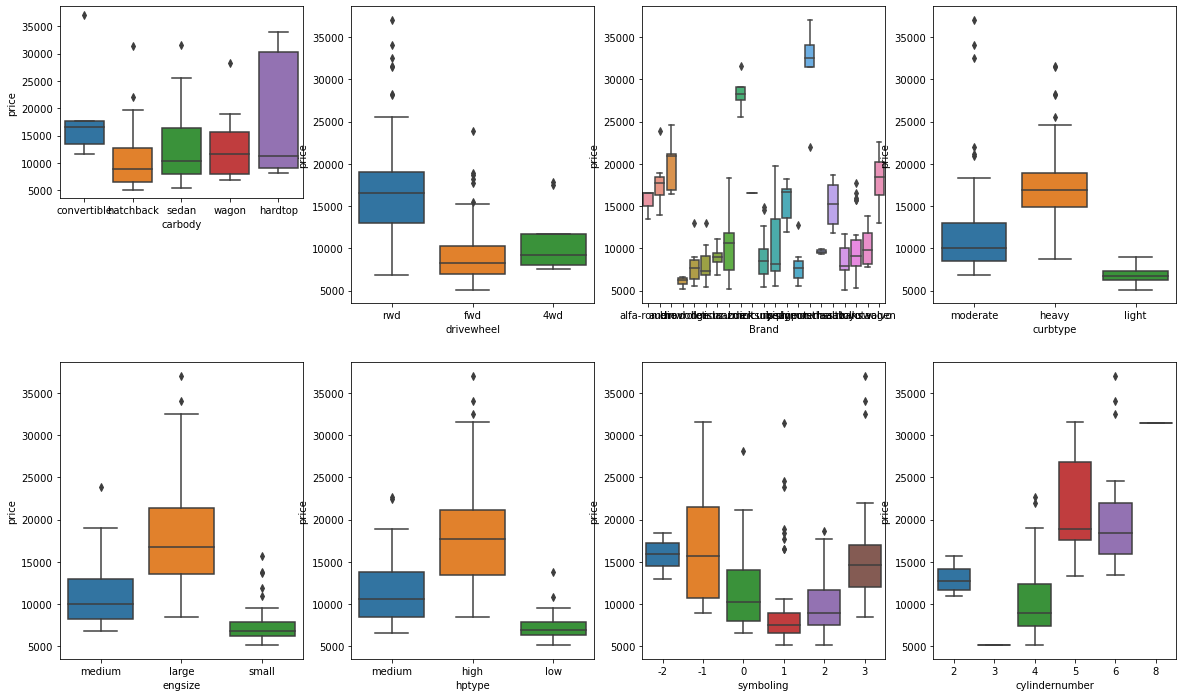

In [36]:

plt.figure(figsize=(20,12))
plt.subplot(3,4,1)
sns.boxplot(data = car, x='carbody', y= 'price' )
plt.subplot(2,4,2)
sns.boxplot(data=car, x='drivewheel',y='price')
plt.subplot(2,4,3)
sns.boxplot(data=car, x='Brand',y='price')
plt.subplot(2,4,4)
sns.boxplot(data=car, x='curbtype',y='price')
plt.subplot(2,4,5)
sns.boxplot(data=car, x='engsize',y='price')
plt.subplot(2,4,6)
sns.boxplot(data=car, x='hptype',y='price')
plt.subplot(2,4,7)
sns.boxplot(data=car, x='symboling',y='price')
plt.subplot(2,4,8)
sns.boxplot(data=car, x='cylindernumber',y='price')
plt.show()

<AxesSubplot:xlabel='Brand', ylabel='price'>

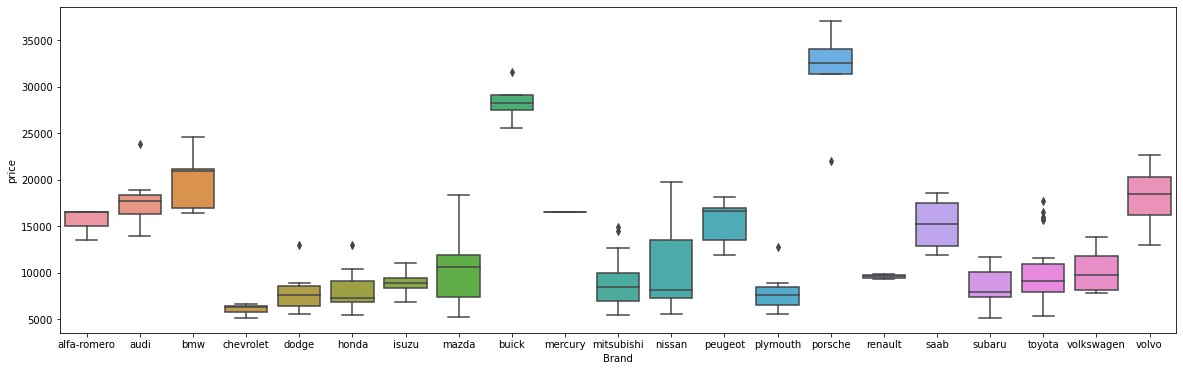

In [37]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Brand',y='price',data=car)

Some observations from above plots:
    
- The Brand boxplot clearly shows us that the car companies like bmw, buick, porsche and volvo has higher prices and the lowest belongs to chevrolet
- cars having "rwd" drivewheel are costly withrespect to other categories.
- Vehicles having more curbweight are supposed to be costly than the light ones.
- Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.
- Large enginesize vehicles are costly as compared to others.
- The cars with extreme (-3 to 3) symboling rating have higher price that the average (0 or 1) ones.


# Step 2: Preparing data for modeling 

### Creating dummy variables for categorical variables

In [38]:
# converting to dummies

dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,...,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [39]:
# concat the dummies dataframe to the main dataframe
car = pd.concat([car,dummies],axis=1)

# dropping all the categorical columns as the dummies are already created
car.drop(columns=categorical.columns,axis=1,inplace=True)

In [40]:
car.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,...,0,0,0,0,0,1,1,0,0,1
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,...,0,0,0,0,0,1,1,0,0,1
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,...,0,0,0,0,0,1,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,...,0,0,0,0,0,1,1,0,0,1
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,...,0,0,0,0,0,1,1,0,0,1


# Step 3: Creating the model

### Train- test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# splitting the data into train and test data
car_train, car_test = train_test_split(car, train_size=0.7, test_size=0.3, random_state=100)

In [43]:
X_train = car_train.drop('price', axis = 1)
y_train = car_train['price']

###  Scaling
As all the final independent variables in our dataset are numeric, we'll scale all the variables


In [44]:
# we will use standard scaler
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)

In [46]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
3,0.938539,0.300864,0.349295,0.291222,0.210773,-0.357333,-0.301113,-0.375031,-0.436398,0.128117,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
195,-1.500467,1.156879,1.462104,0.846708,1.481250,1.220104,-0.301113,0.743637,1.901159,0.513884,...,-0.281718,-0.377964,-0.281718,4.292851,-0.57735,-1.014816,-0.956814,-0.6227,-0.611341,1.0
29,1.751542,-0.441016,0.039168,0.346770,-1.417026,0.715415,-0.301113,1.268012,1.188006,1.510452,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,-0.956814,-0.6227,-0.611341,-1.0
130,-0.687465,-0.402970,0.796243,0.457868,0.568095,0.190357,-0.301113,0.429011,0.633331,-0.257651,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
133,0.938539,0.167706,1.261434,0.457868,0.925416,0.452886,-0.301113,0.044469,0.950288,0.385295,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0


In [47]:
X_train.shape

(136, 44)

In [48]:
y_train.shape

(136,)

### Building the first Linear Regression model with all the features


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
lm.score(X_train,y_train)


0.9632358853045258

Current model is 96% accurate


### Model Building Using RFE


Now we have around 45 features. Manually eliminating them is a very complicated and time consuming task. So we will use RFE.

In [52]:
from sklearn.feature_selection import RFECV,RFE


In [53]:
# Finding oprimal number of features using RFECV
rfecv = RFECV(estimator=lm,step=1,cv=3)
rfecv.fit(X_train,y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 33


In [54]:
#  RFE object
lm = LinearRegression()

# RFE with 33 columns

rfe = RFE(estimator=lm, n_features_to_select=33)

# fit with 33 columns
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('citympg', False, 3),
 ('highwaympg', False, 2),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', True, 1),
 ('Brand_audi', True, 1),
 ('Brand_bmw', True, 1),
 ('Brand_buick', True, 1),
 ('Brand_chevrolet', False, 10),
 ('Brand_dodge', True, 1),
 ('Brand_honda', False, 5),
 ('Brand_isuzu', False, 8),
 ('Brand_mazda', True, 1),
 ('Brand_mercury', False, 12),
 ('Brand_mitsubishi', True, 1),
 ('Brand_nissan', True, 1),
 ('Brand_peugeot', False, 4),
 ('Brand_plymouth', True, 1),
 ('Brand_porsche', True, 1),
 ('Brand_renault', False, 11),
 ('Brand_saab', True, 1),
 ('Brand_subaru', True, 1),
 ('Brand_toyota', False

### Building a Linear Model using statsmodels


In [55]:
import statsmodels.api as sm

In [56]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe.support_]

# subsetting training data for 38 columns
X_train_rfe = X_train[col1]

# add constant to model
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Brand_porsche,Brand_saab,Brand_subaru,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
3,1.0,0.938539,0.300864,0.349295,0.291222,0.210773,-0.357333,-0.301113,-0.375031,-0.436398,...,-0.122169,-0.122169,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
195,1.0,-1.500467,1.156879,1.462104,0.846708,1.481250,1.220104,-0.301113,0.743637,1.901159,...,-0.122169,-0.122169,-0.281718,4.292851,-0.57735,-1.014816,-0.956814,-0.6227,-0.611341,1.0
29,1.0,1.751542,-0.441016,0.039168,0.346770,-1.417026,0.715415,-0.301113,1.268012,1.188006,...,-0.122169,-0.122169,-0.281718,-0.232945,-0.57735,0.985401,-0.956814,-0.6227,-0.611341,-1.0
130,1.0,-0.687465,-0.402970,0.796243,0.457868,0.568095,0.190357,-0.301113,0.429011,0.633331,...,-0.122169,-0.122169,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
133,1.0,0.938539,0.167706,1.261434,0.457868,0.925416,0.452886,-0.301113,0.044469,0.950288,...,-0.122169,8.185353,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0


In [57]:
# fitting the model with 38 variables
lm1 = sm.OLS(y_train,X_train_rfe).fit()

# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     78.69
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           8.64e-59
Time:                        15:18:50   Log-Likelihood:                -1149.0
No. Observations:                 136   AIC:                             2366.
Df Residuals:                     102   BIC:                             2465.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    111.82

If the coefficients is below 0.05, they are statistically significant. So the association is not purely by chance.

R-squared is 96.5%
Meaning that 96.5% of the variance in price is explained by these variables. This is a very good R-squared value.

F statistic should have a very low p value (practically low)


In [58]:
# Now we need VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,enginesize,102.41
7,cylindernumber,35.55
6,curbweight,27.17
9,boreratio,26.87
31,engsize_small,25.48
13,carbody_sedan,20.25
32,hptype_low,20.05
28,curbtype_light,18.77
3,carlength,18.27
30,engsize_medium,18.21


Here enginesize has a VIF of 102 which is very high, so we have to drop this feature.

In [60]:
X_train_rfe.drop('enginesize', axis = 1, inplace = True)
X_train_rfe.head()

,const,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,boreratio,horsepower,...,Brand_porsche,Brand_saab,Brand_subaru,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
3,1.0,0.938539,0.300864,0.349295,0.291222,0.210773,-0.357333,-0.301113,-0.436398,0.128117,...,-0.122169,-0.122169,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
195,1.0,-1.500467,1.156879,1.462104,0.846708,1.481250,1.220104,-0.301113,1.901159,0.513884,...,-0.122169,-0.122169,-0.281718,4.292851,-0.57735,-1.014816,-0.956814,-0.6227,-0.611341,1.0
29,1.0,1.751542,-0.441016,0.039168,0.346770,-1.417026,0.715415,-0.301113,1.188006,1.510452,...,-0.122169,-0.122169,-0.281718,-0.232945,-0.57735,0.985401,-0.956814,-0.6227,-0.611341,-1.0
130,1.0,-0.687465,-0.402970,0.796243,0.457868,0.568095,0.190357,-0.301113,0.633331,-0.257651,...,-0.122169,-0.122169,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
133,1.0,0.938539,0.167706,1.261434,0.457868,0.925416,0.452886,-0.301113,0.950288,0.385295,...,-0.122169,8.185353,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0


In [61]:
# rebuilding the model 
lm1 = sm.OLS(y_train,X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     77.81
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.19e-58
Time:                        15:18:50   Log-Likelihood:                -1152.4
No. Observations:                 136   AIC:                             2371.
Df Residuals:                     103   BIC:                             2467.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    114.08

In [62]:
vif = pd.DataFrame()
vif['features']= X_train_rfe.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values( by = 'VIF', ascending = False)
vif


,features,VIF
6,curbweight,23.52
12,carbody_sedan,20.05
3,carlength,18.10
31,hptype_low,17.97
27,curbtype_light,17.48
11,carbody_hatchback,16.75
9,horsepower,16.29
30,engsize_small,15.05
2,wheelbase,14.14
13,carbody_wagon,11.50


In [63]:
# Dropping curbweight
X_train_rfe.drop('curbweight', axis = 1, inplace = True)

In [64]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     57.14
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.56e-52
Time:                        15:18:51   Log-Likelihood:                -1175.1
No. Observations:                 136   AIC:                             2414.
Df Residuals:                     104   BIC:                             2507.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    134.15

In [65]:
# calculating vif
vif = pd.DataFrame()
vif['Fetures'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
11,carbody_sedan,19.72
30,hptype_low,17.90
3,carlength,17.28
10,carbody_hatchback,16.70
8,horsepower,15.87
29,engsize_small,14.76
2,wheelbase,14.11
12,carbody_wagon,11.48
26,curbtype_light,11.23
4,carwidth,8.86


In [66]:
X_train_rfe.drop('carbody_sedan', axis = 1, inplace = True)

In [67]:
# rebuilding model
lm1= sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     55.14
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.03e-51
Time:                        15:18:51   Log-Likelihood:                -1180.1
No. Observations:                 136   AIC:                             2422.
Df Residuals:                     105   BIC:                             2512.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    138.50

In [68]:
vif = pd.DataFrame()
vif['Fetures'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
29,hptype_low,17.86
3,carlength,17.20
8,horsepower,15.85
28,engsize_small,14.68
2,wheelbase,13.95
25,curbtype_light,11.23
4,carwidth,8.82
30,hptype_medium,8.43
27,engsize_medium,8.12
7,boreratio,6.94


In [69]:
# dropping hptype_low 
X_train_rfe.drop('hptype_low', axis = 1, inplace = True)

In [70]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     57.55
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.71e-52
Time:                        15:18:52   Log-Likelihood:                -1180.1
No. Observations:                 136   AIC:                             2420.
Df Residuals:                     106   BIC:                             2508.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    137.89

In [71]:
vif = pd.DataFrame()
vif['Fetures'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
3,carlength,16.78
28,engsize_small,13.42
2,wheelbase,13.15
25,curbtype_light,11.17
4,carwidth,8.81
27,engsize_medium,7.93
7,boreratio,6.91
26,curbtype_moderate,6.33
8,horsepower,6.24
6,cylindernumber,5.31


In [72]:
# dropping carlength
X_train_rfe.drop('carlength', axis = 1, inplace = True)

In [73]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     58.29
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.66e-52
Time:                        15:18:52   Log-Likelihood:                -1182.1
No. Observations:                 136   AIC:                             2422.
Df Residuals:                     107   BIC:                             2507.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    139.30

In [74]:
vif = pd.DataFrame()
vif['Fetures'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
27,engsize_small,13.22
24,curbtype_light,10.25
2,wheelbase,9.50
26,engsize_medium,7.92
3,carwidth,7.87
6,boreratio,6.65
25,curbtype_moderate,6.33
7,horsepower,6.22
5,cylindernumber,5.30
4,carheight,4.80


In [75]:
# dropping engsize_small
X_train_rfe.drop('engsize_small', axis = 1, inplace = True)

In [76]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     61.00
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.12e-53
Time:                        15:18:53   Log-Likelihood:                -1182.1
No. Observations:                 136   AIC:                             2420.
Df Residuals:                     108   BIC:                             2502.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    138.67

In [77]:
vif = pd.DataFrame()
vif['Fetures'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
24,curbtype_light,10.17
2,wheelbase,9.48
3,carwidth,7.84
25,curbtype_moderate,6.27
7,horsepower,5.73
4,carheight,4.80
11,drivewheel_rwd,4.71
6,boreratio,4.35
5,cylindernumber,3.29
1,symboling,3.22


In [78]:
# dropping curbtype_light
X_train_rfe.drop('curbtype_light', axis = 1, inplace = True)

In [79]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     61.75
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.50e-53
Time:                        15:18:53   Log-Likelihood:                -1184.3
No. Observations:                 136   AIC:                             2423.
Df Residuals:                     109   BIC:                             2501.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    140.29

In [80]:
vif = pd.DataFrame()
vif['Fetures'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
2,wheelbase,9.48
3,carwidth,6.63
7,horsepower,4.67
11,drivewheel_rwd,4.63
4,carheight,4.52
6,boreratio,4.25
5,cylindernumber,3.28
1,symboling,3.21
25,engsize_medium,3.15
26,hptype_medium,2.71


In [81]:
# dropping wheelbase
X_train_rfe.drop('wheelbase', axis = 1, inplace = True)

In [82]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     61.57
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.49e-53
Time:                        15:18:54   Log-Likelihood:                -1187.6
No. Observations:                 136   AIC:                             2427.
Df Residuals:                     110   BIC:                             2503.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    143.05

In [83]:
vif = pd.DataFrame()
vif['Fetures'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Fetures,VIF
6,horsepower,4.53
2,carwidth,4.14
5,boreratio,4.11
10,drivewheel_rwd,3.84
3,carheight,3.55
4,cylindernumber,3.28
24,engsize_medium,3.14
1,symboling,2.72
25,hptype_medium,2.70
23,curbtype_moderate,2.25


In [84]:
# All the features with high VIF have been dropped. But there are still some features with high p-values (above 0.05) 
# and they are insignificant.
# We need to drop these variables

In [85]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     61.57
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.49e-53
Time:                        15:18:54   Log-Likelihood:                -1187.6
No. Observations:                 136   AIC:                             2427.
Df Residuals:                     110   BIC:                             2503.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    143.05

In [86]:
# dropping Brand_nissan
X_train_rfe.drop('Brand_nissan', axis = 1, inplace = True)

In [87]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     64.70
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.10e-54
Time:                        15:18:55   Log-Likelihood:                -1187.6
No. Observations:                 136   AIC:                             2425.
Df Residuals:                     111   BIC:                             2498.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    142.42

In [88]:
# dropping Brand_dodge
X_train_rfe.drop('Brand_dodge', axis = 1, inplace = True)

In [89]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     68.08
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.82e-55
Time:                        15:18:55   Log-Likelihood:                -1187.7
No. Observations:                 136   AIC:                             2423.
Df Residuals:                     112   BIC:                             2493.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    141.82

In [90]:
# dropping symboling
X_train_rfe.drop('symboling', axis = 1, inplace = True)

In [91]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     71.63
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           5.05e-56
Time:                        15:18:55   Log-Likelihood:                -1187.8
No. Observations:                 136   AIC:                             2422.
Df Residuals:                     113   BIC:                             2489.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    141.36

In [92]:
# dropping carheight
X_train_rfe.drop('carheight', axis = 1, inplace = True)

In [93]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     75.55
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           6.37e-57
Time:                        15:18:55   Log-Likelihood:                -1187.9
No. Observations:                 136   AIC:                             2420.
Df Residuals:                     114   BIC:                             2484.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    140.87

In [94]:
# dropping carbody_wagon
X_train_rfe.drop('carbody_wagon', axis = 1, inplace = True)

In [95]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     79.96
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           7.33e-58
Time:                        15:18:56   Log-Likelihood:                -1188.0
No. Observations:                 136   AIC:                             2418.
Df Residuals:                     115   BIC:                             2479.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    140.31

In [96]:
# dropping Brand_mazda
X_train_rfe.drop('Brand_mazda', axis = 1, inplace = True)

In [97]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     84.64
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           9.23e-59
Time:                        15:18:56   Log-Likelihood:                -1188.2
No. Observations:                 136   AIC:                             2416.
Df Residuals:                     116   BIC:                             2475.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    139.90

In [98]:
# dropping Brand_subaru
X_train_rfe.drop('Brand_subaru', axis = 1, inplace = True)

In [99]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     89.81
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.14e-59
Time:                        15:18:56   Log-Likelihood:                -1188.4
No. Observations:                 136   AIC:                             2415.
Df Residuals:                     117   BIC:                             2470.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    139.52

In [100]:
# dropping cylindernumber
X_train_rfe.drop('cylindernumber', axis = 1, inplace = True)

In [101]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     95.48
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.47e-60
Time:                        15:18:56   Log-Likelihood:                -1188.7
No. Observations:                 136   AIC:                             2413.
Df Residuals:                     118   BIC:                             2466.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    139.22

In [102]:
# dropping curbtype_moderate
X_train_rfe.drop('curbtype_moderate', axis = 1, inplace = True)

In [103]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.02e-61
Time:                        15:18:57   Log-Likelihood:                -1189.1
No. Observations:                 136   AIC:                             2412.
Df Residuals:                     119   BIC:                             2462.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    139.05

In [104]:
# dropping hptype_medium
X_train_rfe.drop('hptype_medium', axis = 1, inplace = True)

In [105]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.74e-62
Time:                        15:18:57   Log-Likelihood:                -1189.5
No. Observations:                 136   AIC:                             2411.
Df Residuals:                     120   BIC:                             2458.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    138.89

In [106]:
# dropping engsize_medium
X_train_rfe.drop('engsize_medium', axis = 1, inplace = True)

In [107]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.89e-63
Time:                        15:18:57   Log-Likelihood:                -1190.0
No. Observations:                 136   AIC:                             2410.
Df Residuals:                     121   BIC:                             2454.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    138.84

In [108]:
# dropping Brand_plymouth
X_train_rfe.drop('Brand_plymouth', axis = 1, inplace = True)

In [109]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           5.33e-64
Time:                        15:18:57   Log-Likelihood:                -1190.5
No. Observations:                 136   AIC:                             2409.
Df Residuals:                     122   BIC:                             2450.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    138.79

In [110]:
# dropping carbody_hardtop
X_train_rfe.drop('carbody_hardtop', axis = 1, inplace = True)

In [111]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           7.94e-65
Time:                        15:18:58   Log-Likelihood:                -1191.2
No. Observations:                 136   AIC:                             2408.
Df Residuals:                     123   BIC:                             2446.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    138.88

In [112]:
# dropping Brand_mitsubishi
X_train_rfe.drop('Brand_mitsubishi', axis = 1, inplace = True)

In [113]:
# rebuilding model
lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     144.4
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           4.02e-65
Time:                        15:18:58   Log-Likelihood:                -1193.2
No. Observations:                 136   AIC:                             2410.
Df Residuals:                     124   BIC:                             2445.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    140.41

In [114]:
X_train_rfe.shape

(136, 12)

We came down from 33 variables to 12. Now the VIF and p-values are in good range and the model is explaining most of the variance without being too complex.

# Step 4: Residual analysis

### Distribution of the error terms

In [115]:
y_train_pred = lm1.predict(X_train_rfe)
res = y_train - y_train_pred

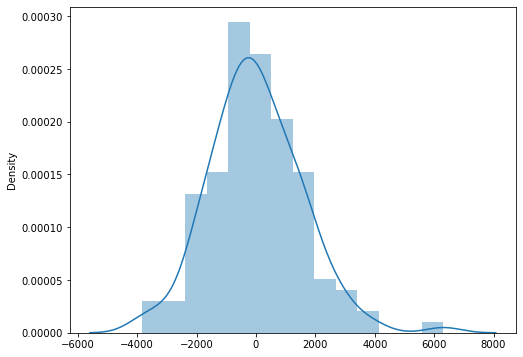

In [116]:
plt.figure(figsize= (8,6))
sns.distplot(res)
plt.show()

The residuals are following a normal distribution curve and the mean is centered around zero.

# Step 5: Model Evaluation and Prediction

Now that our model is ready, its time to make some predictions on the test set.

In [117]:
col_1 = X_train_rfe.columns
col_1

Index(['const', 'carwidth', 'boreratio', 'horsepower', 'carbody_hatchback',
       'drivewheel_rwd', 'Brand_audi', 'Brand_bmw', 'Brand_buick',
       'Brand_porsche', 'Brand_saab', 'Brand_volvo'],
      dtype='object')

In [118]:
X_test = car_test.drop('price', axis = 1)
y_test = car_test['price']

In [119]:
X_test[X_test.columns]= scaler.transform(X_test)

In [120]:
# adding constant to test data
X_test = sm.add_constant(X_test, has_constant = 'add')

In [121]:
X_test.head()

,const,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
174,1.0,-1.500467,0.795451,0.258082,0.457868,0.448988,-0.033698,-0.301113,-0.340073,-0.119442,...,-0.281718,2.645751,-0.281718,-0.232945,-0.577350,0.985401,1.045135,-0.6227,-0.611341,1.0
198,1.0,-2.313470,1.156879,1.462104,0.846708,0.965119,1.244999,-0.301113,0.359095,1.267245,...,-0.281718,-0.377964,-0.281718,4.292851,-0.577350,-1.014816,1.045135,-0.6227,-0.611341,-1.0
156,1.0,-0.687465,-0.479061,-0.590207,-0.708653,-0.305358,-0.936708,-0.301113,-0.759574,-0.436398,...,-0.281718,2.645751,-0.281718,-0.232945,1.732051,-1.014816,1.045135,-0.6227,1.635749,-1.0
136,1.0,1.751542,0.167706,1.261434,0.457868,0.925416,0.708625,-0.301113,0.044469,0.950288,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.577350,0.985401,1.045135,-0.6227,-0.611341,-1.0
161,1.0,-0.687465,-0.479061,-0.590207,-0.708653,-0.384763,-0.843917,-0.301113,-0.759574,-0.436398,...,-0.281718,2.645751,-0.281718,-0.232945,1.732051,-1.014816,1.045135,-0.6227,1.635749,-1.0


In [122]:
X_test_rfe = X_test[col_1]

In [123]:
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 174 to 132
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              59 non-null     float64
 1   carwidth           59 non-null     float64
 2   boreratio          59 non-null     float64
 3   horsepower         59 non-null     float64
 4   carbody_hatchback  59 non-null     float64
 5   drivewheel_rwd     59 non-null     float64
 6   Brand_audi         59 non-null     float64
 7   Brand_bmw          59 non-null     float64
 8   Brand_buick        59 non-null     float64
 9   Brand_porsche      59 non-null     float64
 10  Brand_saab         59 non-null     float64
 11  Brand_volvo        59 non-null     float64
dtypes: float64(12)
memory usage: 6.0 KB


In [124]:
y_pred = lm1.predict(X_test_rfe)

In [125]:
y_pred.head()

174    10314.362809
198    19277.873407
156     7949.083703
136    15571.239204
161     6968.165838
dtype: float64

In [126]:
y_test.head()

174    10698.0
198    18420.0
156     6938.0
136    18150.0
161     8358.0
Name: price, dtype: float64

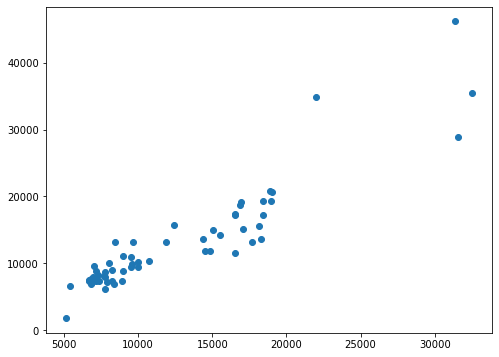

In [127]:
# plotting y_test and y_pred to understand the spread
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_pred)

The model is performng well on the test set as well.


In [128]:
from sklearn.metrics import r2_score

In [129]:
# checking r-squared of the test set
r_square = r2_score(y_test,y_pred)
r_square

0.7460417672634025

### Checking the correlations between the final predictor variables


In [130]:
Columns = ['carwidth', 'boreratio', 'horsepower', 'carbody_hatchback',
       'drivewheel_rwd', 'Brand_audi', 'Brand_bmw', 'Brand_buick',
       'Brand_porsche', 'Brand_saab', 'Brand_volvo']

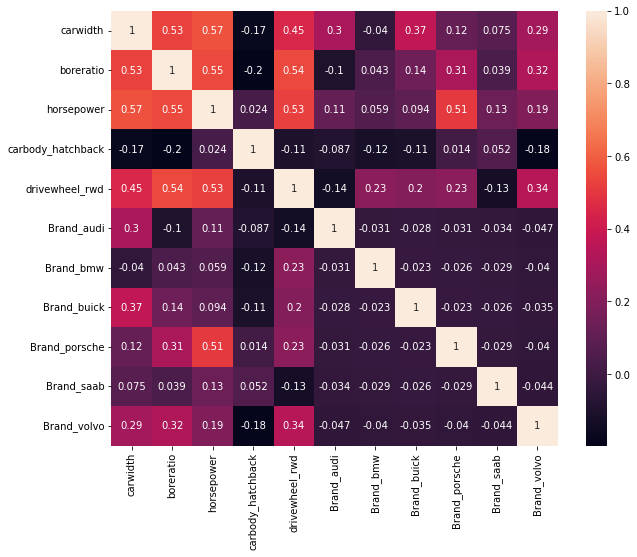

In [131]:
plt.figure(figsize = (10,8))
sns.heatmap(car[Columns].corr(), annot = True)
plt.show()

The final predictor variables have low correlation